In [1]:
import sys
sys.path.append('../code')
from init_mooc_nb import *
init_notebook()
%output size=150
pi_ticks = [(-np.pi, r'$-\pi$'), (0, '0'), (np.pi, r'$\pi$')]


def Qi_Wu_Zhang(w=None):
    def onsite(site, p):
        return - p.mu * pauli.sz
    
    def hopx(site1, site2, p):
        return - 0.5j * p.delta * pauli.sy - p.t * pauli.sz
    
    def hopy(site1, site2, p):
        return - 1j * p.gamma * pauli.sx  - p.gamma * pauli.sz  
    
    lat = kwant.lattice.square()

    if w == None:
        sys = kwant.Builder(kwant.TranslationalSymmetry(*lat.prim_vecs))
        sys[lat.shape(lambda pos: True, (0, 0))] = onsite
    else:
        def ribbon_shape(pos):
            return (0 <= pos[1] < w )

        sym = kwant.TranslationalSymmetry((1, 0))
        sys = kwant.Builder(sym)
        sys[lat.shape(ribbon_shape, (0, 0))] = onsite

    sys[kwant.HoppingKind((1,0), lat)] = hopx
    sys[kwant.HoppingKind((0,1), lat)] = hopy
    return sys


def title(p):
    title = r"$t={:.2}$, $\mu={:.2}$, $\Delta={:.2}$, $\gamma={:.2}$"
    title = title.format(p.t, p.mu, p.delta, p.gamma)
    return title

Populated the namespace with:
np, matplotlib, kwant, holoviews, init_notebook, interact, display_html, plt, pf, SimpleNamespace, pprint_matrix, scientific_number, pretty_fmt_complex
from code/edx_components:
MoocVideo, PreprintReference, MoocDiscussion, MoocCheckboxesAssessment, MoocMultipleChoiceAssessment, MoocPeerAssessment, MoocSelfAssessment
from code/functions:
spectrum, hamiltonian_array, h_k, pauli


Press this button to show/hide the code used in the notebook:

## Quantum Hall effect on a lattice and the Dirac Hamiltonian
* Pairs of chiral edges in a 1D wire
* Coupling wires and QHE without field
* Dirac equation at the phase transition

# Introduction: stacking wires

Looking back at the material from the past weeks, you might have the impression that the quantum Hall effect and one dimensional topological superconductors are really different topics, and not connected at all.

Xiaoliang Qi from Stanford University will now explain that this is not the case, and will also introduce this week's topic - Chern insulators.

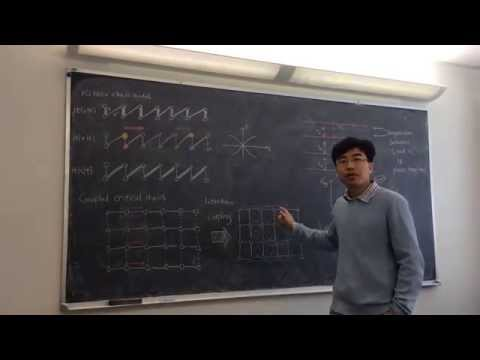

In [2]:
MoocVideo("osKP6x0Ewbo", src_location="4.1-intro")

# Pairs of chiral edges in a 1D wire

Last week, we started with a phenomenological description of the quantum Hall effect. We learned that one way to get a quantum Hall state is to place electrons in an external magnetic field.

However, we still don't have a simple lattice Hamiltonian describing the quantum Hall effect - we'd like to have something like the Kitaev chain model, which was very useful to understand Majoranas in the first two weeks of the course. An added benefit of finding this tight binding model is that it would not need an external magnetic field to exhibit the unique properties of quantum Hall effect.

These models exist, and they are referred to as *Chern insulators*. The quantum Hall effect without an external magnetic field is also referred to as the *quantum anomalous Hall effect*. Duncan Haldane, from who we will hear in the next chapter, invented the first model of a Chern insulator now known as *Haldane model*. However, in this chapter, we will use a more natural route that fits better into the context of our course so far.

## General strategy to construct a lattice model for the Quantum Hall Effect

What we will do to get a model for a Chern insulator is to follow a "domino prescription", as we did to get the Kitaev model in week 1. Our strategy will have two key aspects:

* Focusing on the unique property of the quantum Hall edge that cannot exist in isolation from a bulk, and can only be present because of bulk-boundary correspondence. For the Kitaev chain, this property was the presence of unpaired Majorana modes. In the quantum Hall effect, it is the chiral edge states.

* Finding a lower dimensional building block, from which we can somehow “extract“ in a clever way the exotic object we are interested in. In the Kitaev chain, these were the fermionic sites, which we could think of as a pair of Majorana modes.

So we need to find a one-dimensional system which can host a pair of chiral edge states. Since they are one-dimensional, these states will necessarily be spatially on top of each other, essentially a pair of propagating modes with opposite velocity. Once we have this building block, we can follow the domino prescription: couple the counter-propagating states in pairs, just like we did with Majorana modes. We then end up with a pair of spatially separated chiral edge states, and so a quantum Hall insulator without magnetic field.

So our plan is to turn the system on the left into the system on the right:

![](figures/coupled_chains.svg)

Voilà - we have a lattice model for the 2D quantum Hall state!

## Getting a one dimensional wire with a pair of edge states

Let's focus on the first essential step of our plan: finding a one dimensional system with a pair of counter-propagating chiral states.

You might guess that the easiest way to get a pair of states moving in opposite directions is to take the usual one dimensional single electron Hamiltonian with an effective mass. Such a system has a parabolic dispersion and the low energy excitations at a finite Fermi wave-vector $k=\pm k_F$ move in opposite directions. The catch is that these two states have different momenta, and it is tricky (though not impossible) to deal with momentum conservation when pairing the edges. So we will avoid this approach.

The more educated guess we make a model that we have already encountered, the Dirac model $H= \Delta\,k\, \tau_y$ of the Kitaev chain at the topological phase transition.

More specifically, in the first week we wrote the Kitaev Hamiltonian in momentum space as $H(k)=-(2 t\cos{k}+\mu)\,\tau_z+\Delta \sin{k}\tau_y$.  At the critical point $\mu=-2t$, we found the Kitaev Hamiltonian to become

$$H=-2t(\cos{k}-1)\,\tau_z+\Delta\sin{k}\,\tau_y.$$

We see that at $k\approx 0$ we have a pair of states with wave functions the eigenvalues $\pm 1$ of $\tau_y$, and with opposite and equal velocities.

At this point you might worry that the Kitaev model has superconductivity, and so the $\tau$ matrices refer to particle and hole degrees of freedom. Indeed, these ingredients should not enter in the description of the quantum Hall effect. But this is not a real issue, because we can just interpret the $\tau$ matrices as acting in the space of left- and right-movers. This flexibility in interpreting the Hamiltonian terms in different ways, depending on the context, is part of the advantage of thinking in terms of toy models.

Finally, before we go on with our plan, keep in mind that considering the phase transition point of a lower dimensional model turns out to be a fairly generic strategy to construct higher dimensional topological models.

In [3]:
question = ("It seems that both a quantum Hall bar and a Kitaev chain can have chiral states. "
            "Apart from the two systems having different dimensionality"
            ", what's the fundamental difference between the two cases?")
answers = ["The quantum Hall edge states go in opposite directions, while the Kitaev states go in the same direction.",
           "The quantum Hall edge states go in the same direction, while the Kitaev states go in opposite directions.",
           "The quantum Hall edges always cross zero energy at zero momentum while the Kitaev states don't.",
           ("The Kitaev chiral states exist only at specific parameter values, "
            "while the quantum Hall edge states don't.")]
explanation = ("The pair of chiral states in the Kitaev model only exists at "
               "the phase transition point, when the chain becomes gapless. "
               "On the other hand, chiral edge states are a topological property of the quantum Hall state. "
               "They are separated by a gapped bulk which protects them, and they exist for a full range of parameter values.")
MoocMultipleChoiceAssessment(question, answers, correct_answer=3, explanation=explanation)

MoocMultipleChoiceAssessment(**{'max_attempts': 2, 'answers': ['The quantum Hall edge states go in opposite directions, while the Kitaev states go in the same direction.', 'The quantum Hall edge states go in the same direction, while the Kitaev states go in opposite directions.', "The quantum Hall edges always cross zero energy at zero momentum while the Kitaev states don't.", "The Kitaev chiral states exist only at specific parameter values, while the quantum Hall edge states don't."], 'question': "It seems that both a quantum Hall bar and a Kitaev chain can have chiral states. Apart from the two systems having different dimensionality, what's the fundamental difference between the two cases?", 'explanation': 'The pair of chiral states in the Kitaev model only exists at the phase transition point, when the chain becomes gapless. On the other hand, chiral edge states are a topological property of the quantum Hall state. They are separated by a gapped bulk which protects them, and they exist for a full range of parameter values.', 'correct_answer': 3, 'display_name': 'Question'})

# QHE without a magnetic  field

## Deriving the model Hamiltonian

Let us now couple the wires to get the quantum Hall system as promised. We take a stack of chains all extending along the horizontal $x$ direction, like in the figure above. We stack them one next to the other along the $y$ direction, so that we form a square lattice. If we take a large (ideally infinite) stack of chains we have a truly two-dimensional system.

Now let us make this formal by first labeling the chains by an index $n_y$, which takes integer values. Let us also replace $k\rightarrow k_x$ to denote the wave-vector along a chain. Hence a single chain has the Hamiltonian $\left[-(2 t\cos{k_x}+\mu)\,\tau_z+\Delta \sin{k_x}\tau_y\right]\,\otimes\,\left|\,n_y\right\rangle\left\langle n_y\right|$. The projector $\left|\,n_y\right\rangle\left\langle n_y\right|$ is needed to single out one chain from the stack. 

Now all that we have to do is to couple the $\tau_y=-1$ branch of one chain to the $\tau_y=+1$ branch of a neighboring chain,  and we will have a quantum Hall state.

A term coupling opposite movers from different chains is $\left|\,n_y\right\rangle\left\langle n_y+1\right|\otimes (\tau_z+i\tau_x)$. The first part couples neighboring chains and the matrix $(\tau_z+i\tau_x)$ turns a right mover into a left mover, which is what we want. Let's call the strength of this coupling $\gamma$.

To obtain the complete Hamiltonian of the stack of chains we just need to sum over $n_y$, and we obtain

$$H=\sum_{n_y}\,\left[-(2 t\cos{k_x}+\mu)\tau_z+\Delta \sin{k_x}\tau_y\right]\,\otimes\,\left|\,n_y\right\rangle\left\langle n_y\right|\,-\,\gamma\,\sum_{n_y}\,\left[\left|\,n_y\right\rangle\left\langle n_y+1\right|\otimes (\tau_z+i\tau_x)\,+\,\textrm{h.c.}\right].$$

This Hamiltonian should in principle suffice to produce a quantum Hall state.

## Gap and edge states

Let's first consider a finite number of chains $n_y=1,\dots,N$. If you tune each chain individually to the point $\mu = -2t$, it's easy to check that at $k_x \approx 0$ the above Hamiltonian has one right-moving edge eigenstate for $n_y=1$ with eigenvalue $\approx \Delta \, k_x$, and a left-moving edge eigenstate for $n_y=N$  with eigenvalue $\approx -\Delta\,k_x$.

The next thing we need to check is that these are the only eigenstates close to zero energy. In other words, is the system gapped in the two-dimensional bulk?  To see this, let's switch to an infinite stack of chains along the $y$ direction. We then have full translational invariance, so we can go to momentum space in the $y$ direction.

This leads us to the two-dimensional Bloch Hamiltonian 

$$H(k_x,k_y)=[-(2t\cos{k_x}+\mu)\tau_z+\Delta\sin{k_x}\tau_y]-2\gamma\,[\cos{k_y}\tau_z+\sin{k_y}\tau_x].$$ 

Since this Hamiltonian is a sum of three Pauli matrices, the energy spectrum can be written down as 

$$E(k_x,k_y)=\pm\sqrt{\Delta^2\sin^2{k_x}+(2\gamma\cos{k_y}+\mu+2t\cos{k_x}))^2+4\gamma^2\sin^2{k_y}}.$$ 

Aside from special points, this spectrum is gapped, just like we wanted. For instance it is gapped if $\mu<-2t-2\gamma$. If we start from this point and increase the value of $\mu$, the gap closes at the point $\mu = -2t-2\gamma$ and then reopens:

b':HoloMap   [$\\mu$]\n   :Overlay\n      .Surface.I  :Surface   [$k_x$,$k_y$]   ($E$)\n      .Surface.II :Surface   [$k_x$,$k_y$]   ($E$)'
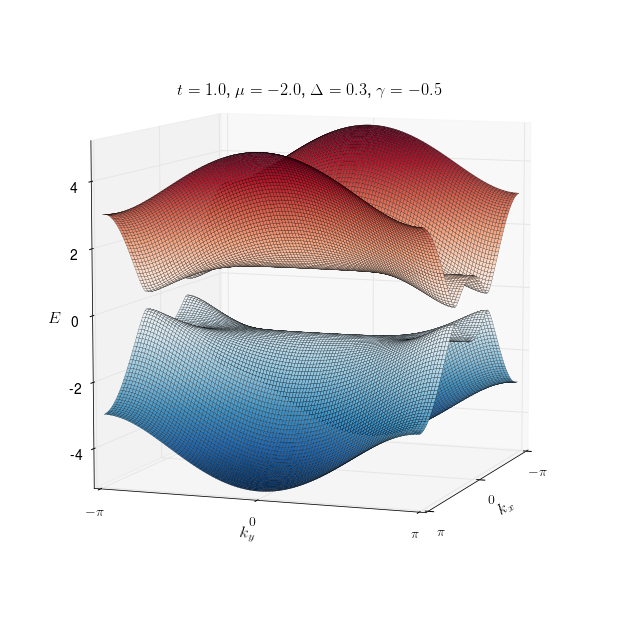
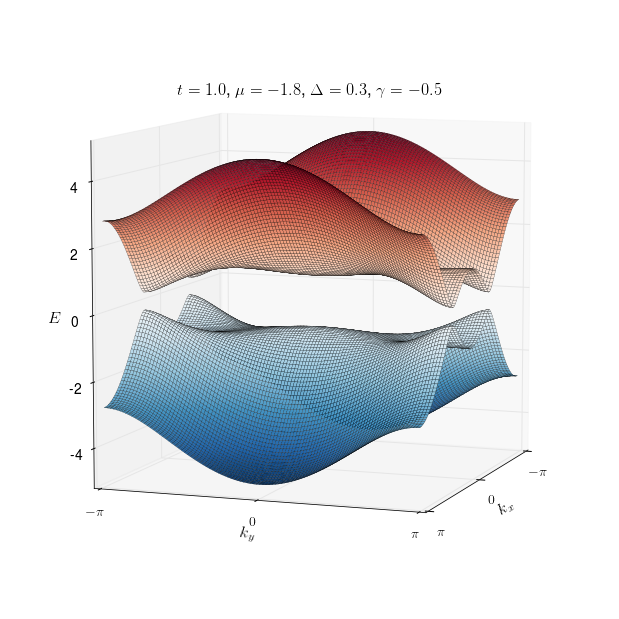
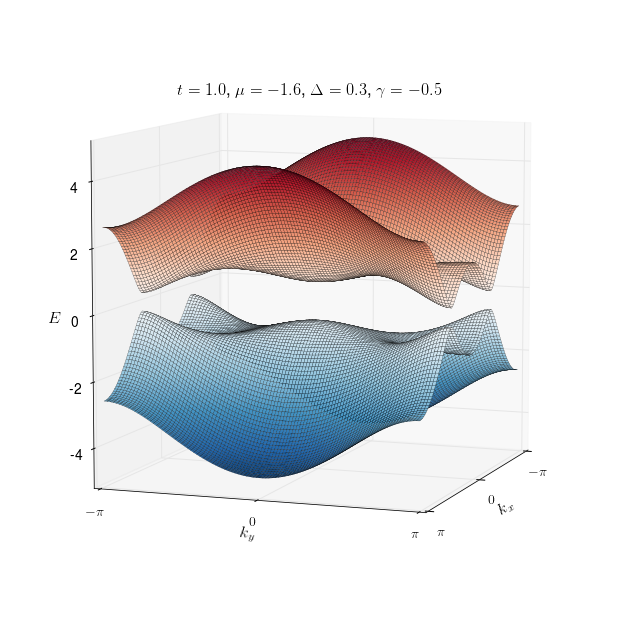
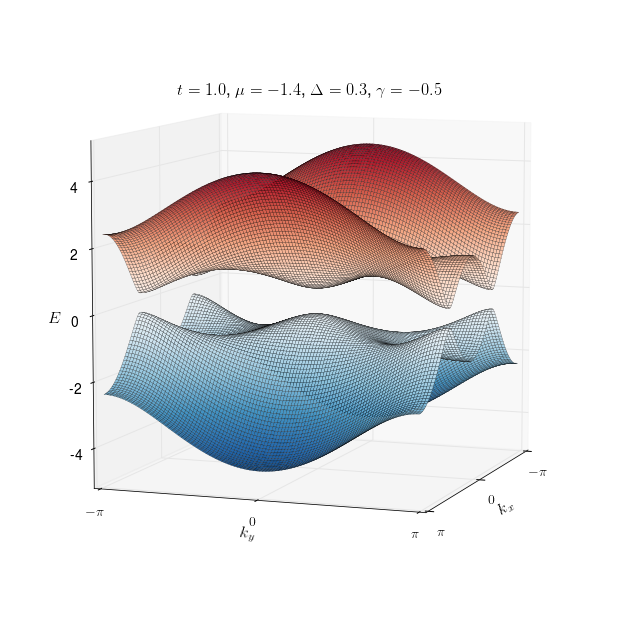
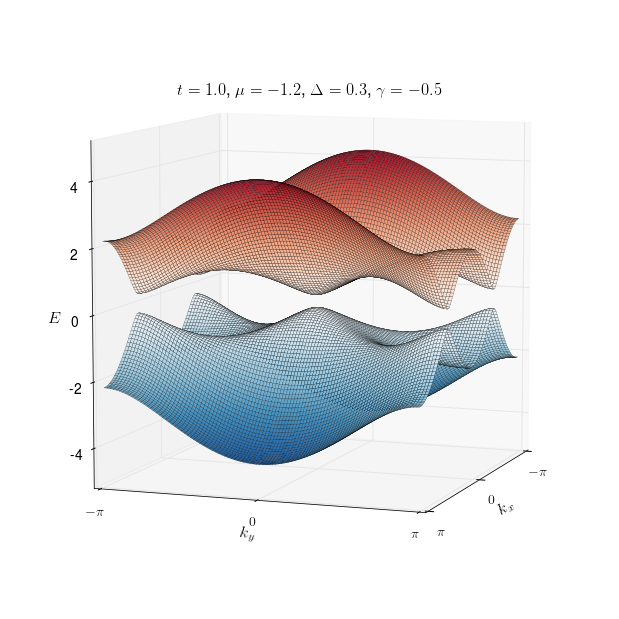
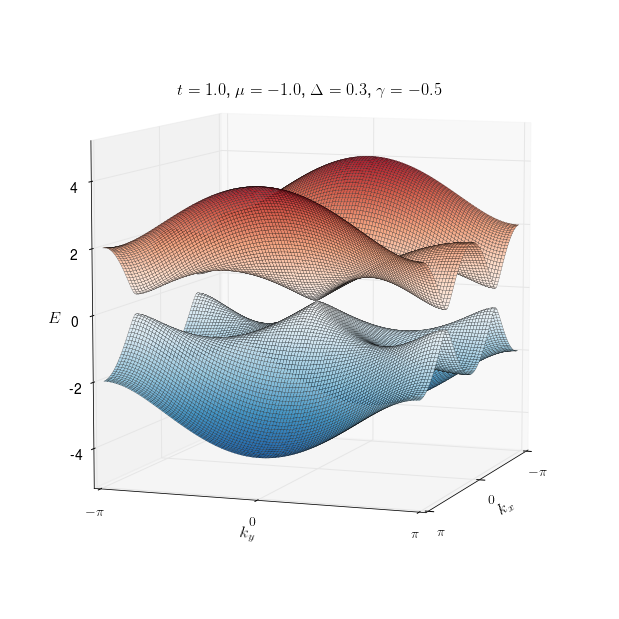
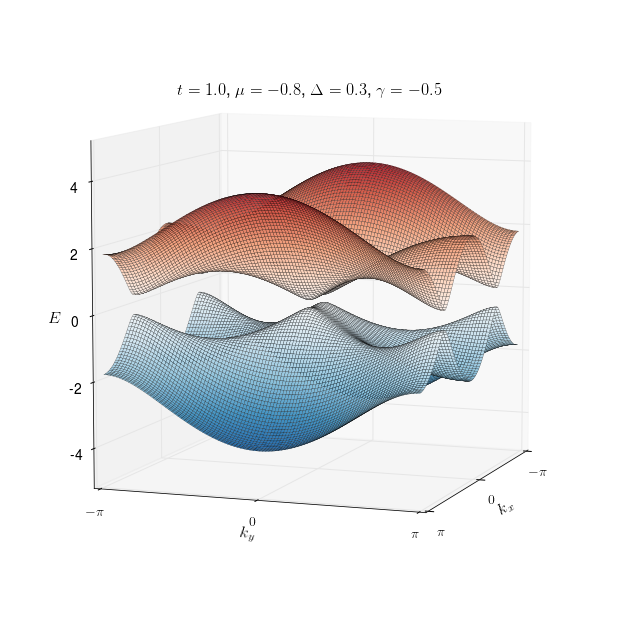
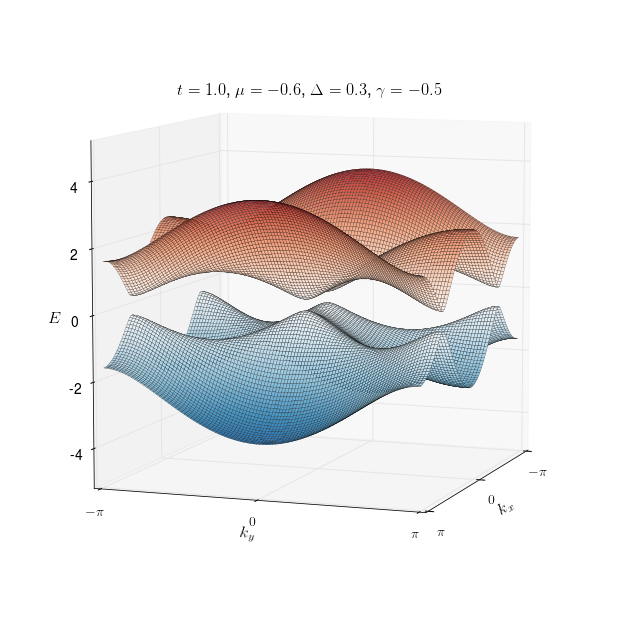
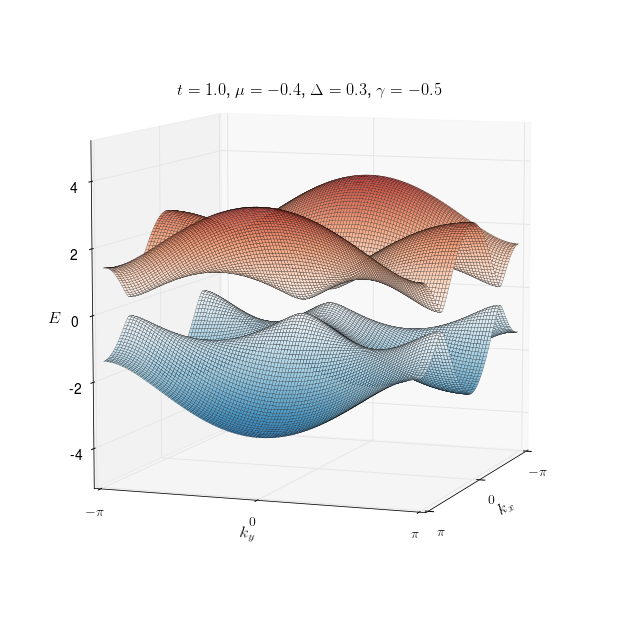
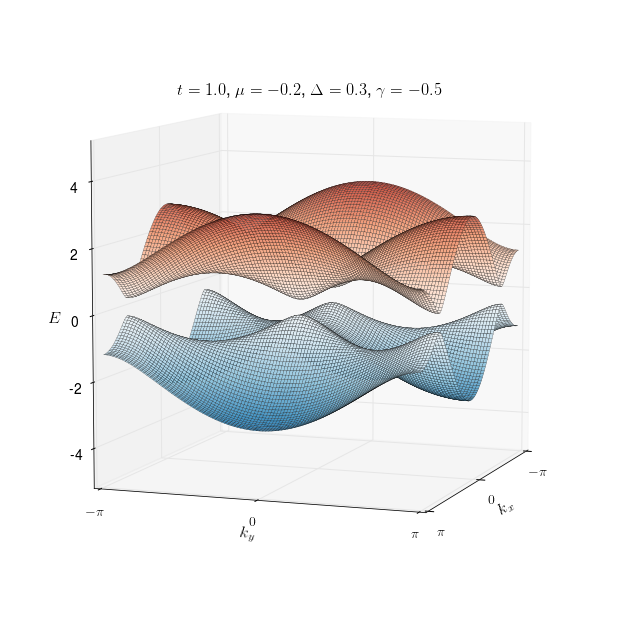
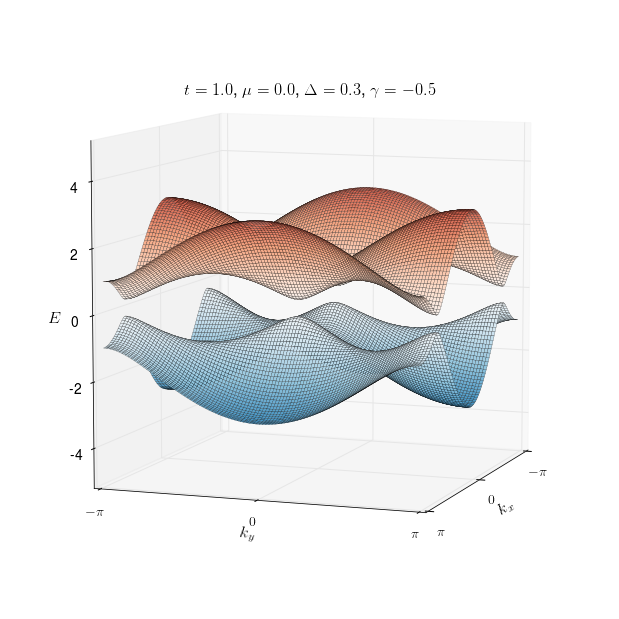

In [4]:
p = SimpleNamespace(t=1.0, delta=0.3, gamma=-.5, mu=None)
sys = Qi_Wu_Zhang()
mus = np.linspace(-2, 0, 11)
holoviews.HoloMap({p.mu: spectrum(sys, p, zticks=[-4, -2, 0, 2, 4], title=title)
                   for p.mu in mus}, kdims=[r'$\mu$'])

As a check that everything worked, let's look at the dispersion of a ribbon with finite width along the $y$ direction. If there are edge states, we should see a Dirac-like crossing around $k_x=0$.

b':HoloMap   [$\\mu$]\n   :Path   [$k$,$E/t$]'
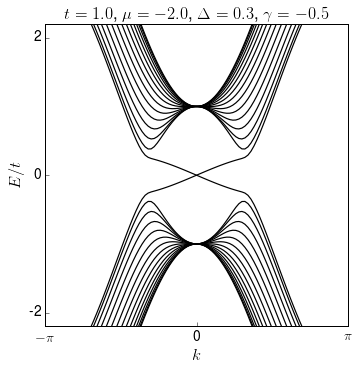
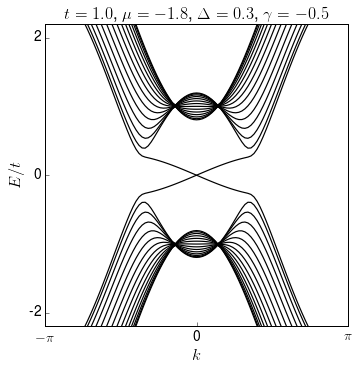
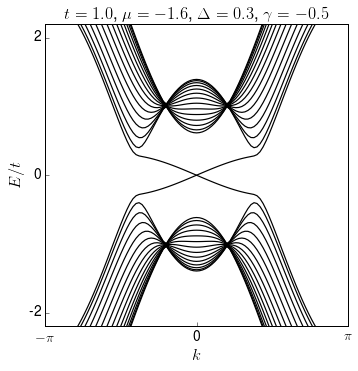
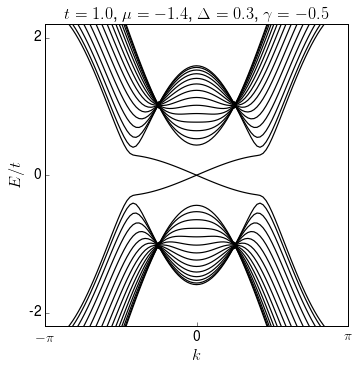
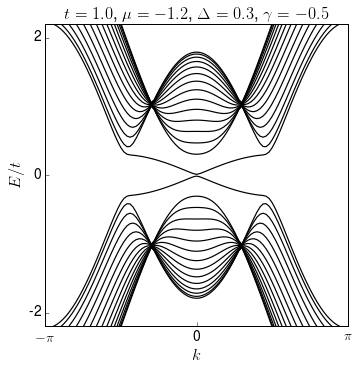
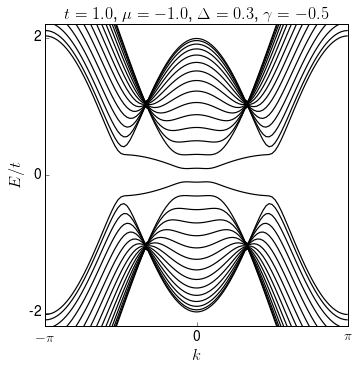
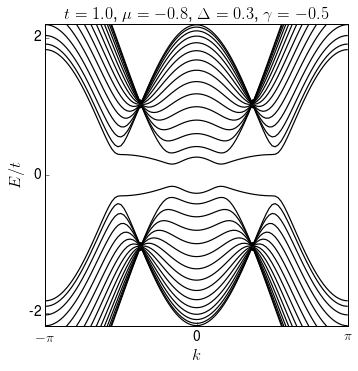
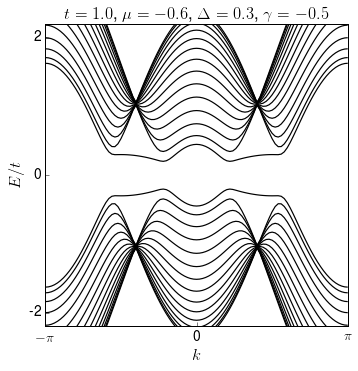
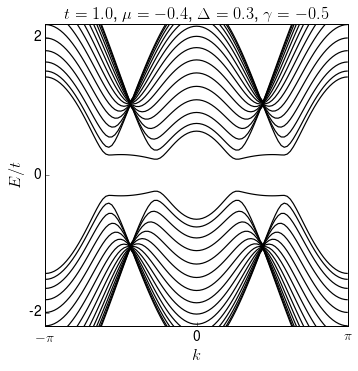
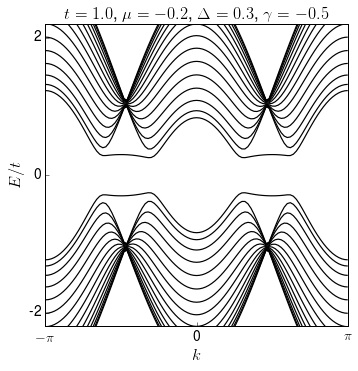
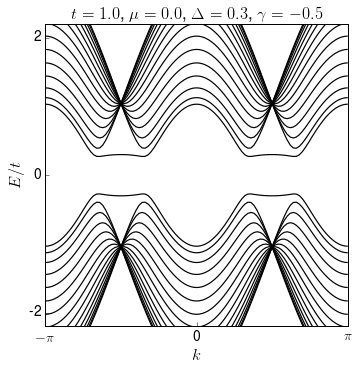

In [5]:
p = SimpleNamespace(t=1.0, delta=0.3, gamma=-0.5, mu=None)
sys = Qi_Wu_Zhang(w=15)
mus = np.linspace(-2, 0, 11)

style = {'xdim': r'$k$',
         'ydim': r'$E/t$',
         'xticks': pi_ticks,
         'yticks': [-2, 0, 2],
         'ylims': [-2.2, 2.2],
         'title': title}

holoviews.HoloMap({p.mu: spectrum(sys, p, **style) for p.mu in mus}, kdims=[r'$\mu$'])

We see that the crossing is there, and it disappears when the gap closes. So we can identify the point $\mu=-2t-2\gamma$ as a critical point at which the quantum Hall state becomes topologically trivial.

While details such as the bulk spectrum and edge dispersion are different from the case with a magnetic field, the bulk-edge correspondence tells us that the edge states are as robust as those of the quantum Hall effect we studied last week.

In [6]:
question = ("How does our lattice model with no magnetic field differ from the original quantum Hall effect?")
answers = ["Since there is no magnetic field the quantum Hall effect on a lattice preserves time reversal symmetry.",
           "Quantum Hall effect in a magnetic field has Landau levels "
           "that do not disperse in k while they disperse in the lattice.",
           "Quantum Hall effect in the lattice has no chiral edge states, which arise from skipping orbits in a magnetic field.",
           "In a magnetic field the filling fraction is fixed to integer per flux quantum, while in the "
           "lattice the filling fraction per unit cell is arbitrary."]
explanation = ("In a lattice one gets a non-constant bandstructure which forms a Dirac cone near the phase transition.")
MoocMultipleChoiceAssessment(question, answers, correct_answer=1, explanation=explanation)

MoocMultipleChoiceAssessment(**{'max_attempts': 2, 'answers': ['Since there is no magnetic field the quantum Hall effect on a lattice preserves time reversal symmetry.', 'Quantum Hall effect in a magnetic field has Landau levels that do not disperse in k while they disperse in the lattice.', 'Quantum Hall effect in the lattice has no chiral edge states, which arise from skipping orbits in a magnetic field.', 'In a magnetic field the filling fraction is fixed to integer per flux quantum, while in the lattice the filling fraction per unit cell is arbitrary.'], 'question': 'How does our lattice model with no magnetic field differ from the original quantum Hall effect?', 'explanation': 'In a lattice one gets a non-constant bandstructure which forms a Dirac cone near the phase transition.', 'correct_answer': 1, 'display_name': 'Question'})

# Dirac equation at the phase transition

Back in week 1, we saw with the Kitaev chain that the "domino argument" led to two distinct phases. The same is true for our model, even though the parameter space is larger than before, with three distinct parameters $\mu, t, \gamma$, which we have not explored fully. But let's not worry about establishing the full phase diagram. For now it's more interesting to study the transition point we have found.

The two phases around this point are easy to understand. One is the quantum Hall phase with chiral edge states, which was our initial goal. The other one is a topologically trivial phase. The trivial phase can be understood by first taking $\mu$ very positive and large, and then taking $\gamma\to 0$. Then we just have a bunch of gapped 1D chains next to each other without any tunneling between them, a trivial phase with no edge states.

It is once again useful to write down the effective Hamiltonian near to the transition point at $k_x\approx 0$ and $k_y\approx 0$. It is given by a 2D Dirac Hamiltonian:


$$H_{\textrm{Dirac}}=[\Delta k_x\tau_y-2\gamma k_y\tau_x+m\tau_z],$$ 


The combination $m=-(\mu +2t+2\gamma)$ serves as the 'mass' in this Dirac model. As before, we see that the gapless phase transition point at $m=0$ is described by a massless Dirac Hamiltonian. The phase transition separates the topological from the trivial phase, and the two phases are characterized by a different sign of the mass (in this case $m>0$ in the topological phase and $m<0$ in the trivial phase).

As with Kitaev chains, the Dirac model gives us another way to construct chiral edge states at the domain wall between topological and non-topological phases. Back in week 1, we saw that for a one dimensional Dirac model, a domain wall in the mass $m$ supports a non-degenerate zero mode. Fixing  $k_y=0$, we see that the one dimensional Dirac Hamiltonian here is identical to the one we saw in week 1, where the zero mode at the domain wall between $m<0$ and $m>0$ was an eigenstate of $\tau_x$ with eigenvalue $+1$. 

Unlike the one-dimensional case, the zero mode is not stationary in the two dimensional case. By adding $2\gamma k_y\tau_x$ as a perturbation, we see that the energy of the state increases as 

$$\epsilon(k_y)\approx 2\gamma k_y\,,$$

so it has a velocity $v=2\gamma$, the direction of which depends on the sign of $\gamma$. So we see how we can get the chiral edge modes analytically.

# Conclusion

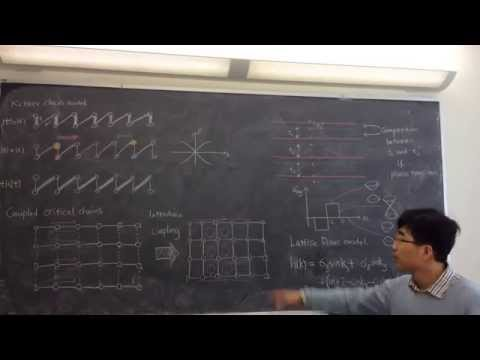

In [7]:
MoocVideo("CXgAcOOVlag", src_location='4.1-summary')

**Questions about what you learned? Ask them below**

In [8]:
MoocDiscussion('Questions', 'Chern insulators')

MoocDiscussion(**{'discussion_category': 'Questions', 'display_name': 'Chern insulators', 'discussion_id': '40b7703b3c6bf29312ce60adc187a6cc', 'discussion_target': 'Chern insulators'})